In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [40]:
train.head()

,Donut Estimator 1,Donut Area of cross section,Donut Area of circumference circle,Donut area of central hole / Donut Area of circumscribed circle,Donut Estimator 2,Donut Estimator 3,Donut Estimator 4,Donut Estimator 5,Donut volume Estimator 6,Location,Donut Density,Donut volume
0,317.61,496.27,682.80,0.27,818.25,788.89,567.20,557.68,579.17,Mumbai,14.3,52.1
1,315.19,538.85,645.77,0.17,800.65,798.97,560.37,561.20,577.59,Mumbai,15.8,54.2
2,317.44,514.24,661.30,0.22,795.79,801.74,579.30,584.34,575.06,Mumbai,16.3,54.8
3,336.62,562.98,709.35,0.20,888.29,862.33,596.66,588.34,629.96,Mumbai,16.6,56.6
4,331.76,558.90,635.54,0.12,801.16,811.17,593.59,599.81,586.01,Mumbai,18.3,56.9


In [7]:
train.shape

(749, 13)

check if null values exists

In [8]:
train.isnull().values.any()

False

In [9]:
test.isnull().values.any()

False

In [43]:
train.drop('Donut ID',axis=1, inplace=True)

Donut Estimator 1


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


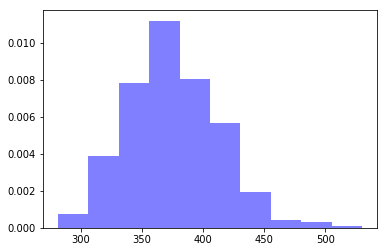

Donut Area of cross section


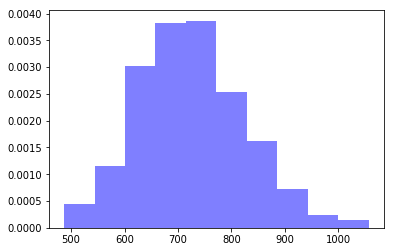

Donut Area of circumference circle


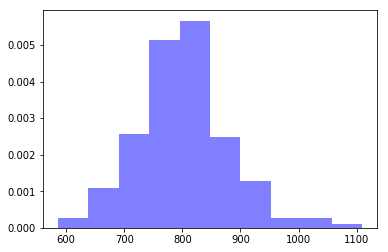

Donut area of central hole / Donut Area of circumscribed circle


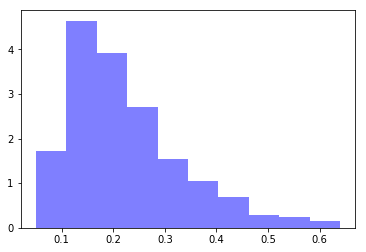

Donut  Estimator 2


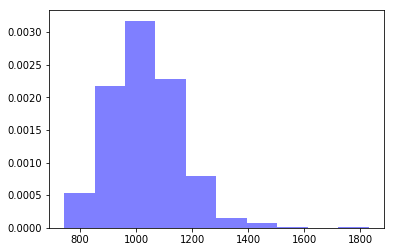

Donut  Estimator 3


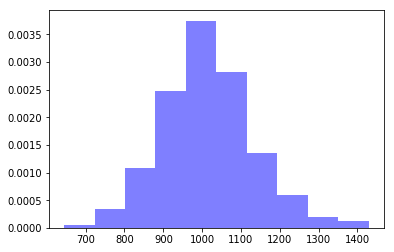

Donut  Estimator 4


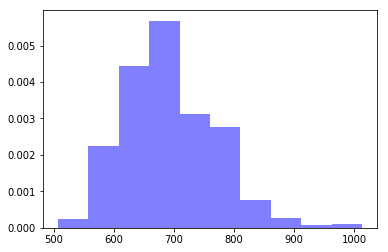

Donut  Estimator 5


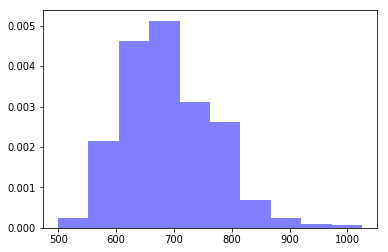

Donut volume Estimator 6


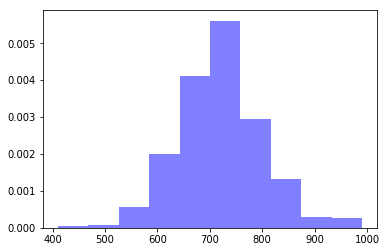

Location
Donut Density


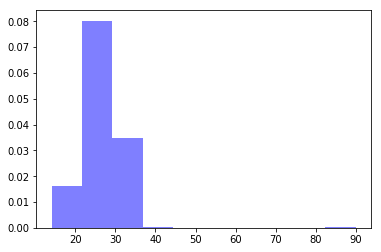

Donut volume


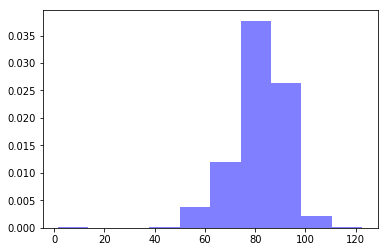

In [52]:
for item in train.columns.values:
    print (item)
    if item != 'Location': 
        num_bins = 10
        plt.hist(train[item], num_bins, normed=1, facecolor='blue', alpha=0.5)
        plt.show()

### outlier detection

In [20]:
train.columns.values

array(['Donut ID', 'Donut Estimator 1', 'Donut Area of cross section',
       'Donut Area of circumference circle',
       'Donut area of central hole / Donut Area of circumscribed circle',
       'Donut  Estimator 2', 'Donut  Estimator 3', 'Donut  Estimator 4',
       'Donut  Estimator 5', 'Donut volume Estimator 6', 'Location',
       'Donut Density', 'Donut volume'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f00cefaa5f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f00cefaa518>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f00cefaa4a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f00cf14f320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f00cf14feb8>],
 'means': []}

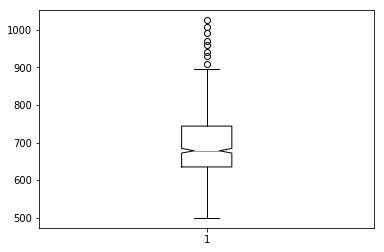

In [21]:
plt.boxplot(train['Donut  Estimator 5'], 1)

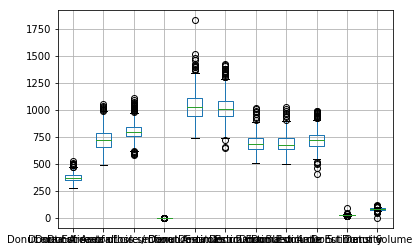

In [44]:
#pd.options.display.mpl_style = 'default'
train.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00c659e9e8>,
      dtype=object)

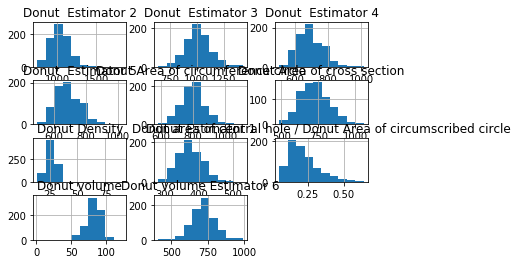

In [45]:
train.hist()

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
train_x = train.drop(['Donut Density','Donut volume','Location'], axis=1)
density_train_y = train['Donut Density']

#train_x = train.drop(['Donut Density','Donut volume'], axis=1)
volume_train_y = train['Donut volume']

In [87]:
density_train_y.head()

0    14.3
1    15.8
2    16.3
3    16.6
4    18.3
Name: Donut Density, dtype: float64

### training for donut density

In [88]:
x = train_x.values
y = density_train_y.values

In [90]:
x.shape

(749, 9)

In [91]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [92]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
yPrediction = linearRegressor.predict(xTest)

In [97]:
accuracy = linearRegressor.score(xTest,yTest)
print(accuracy*100,'%')

47.06581008097469 %
